In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [2]:
def deg_to_rad(x):
    return x * np.pi / 180

In [3]:
def rad_to_deg(x):
    return x * 180 / np.pi

In [4]:
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)

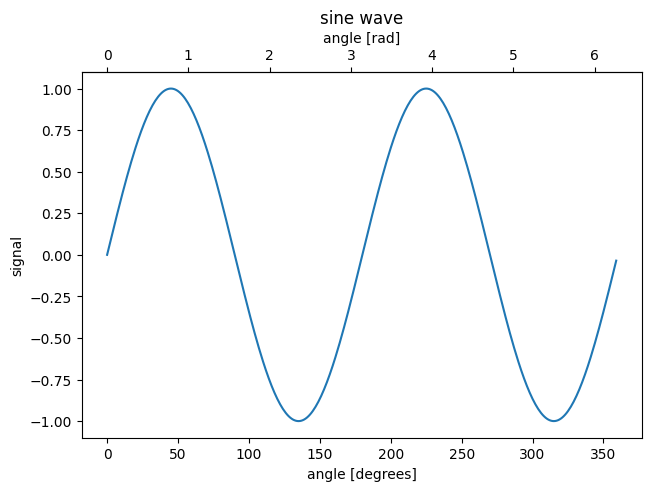

In [5]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, y)
ax.set_xlabel("angle [degrees]")
ax.set_ylabel("signal")
ax.set_title("sine wave")

secax = ax.secondary_xaxis("top", functions=(deg_to_rad, rad_to_deg))
secax.set_xlabel("angle [rad]")
plt.show()